**Импорт всех необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 40)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

<b><p>data.csv</p></b>
<ul>
<li>id: id транзакции </li>
<li>timestamp: дата продажи (транзакции) </li>
<li>full_sq: общая площадь  </li>
<li>life_sq: жилая площадь  </li>
<li>floor: этаж  </li>
<li>max_floor: количество этажей в здании </li>
<li>material: материал, из которого изговолены стены  </li>
<li>build_year: год строительства </li>
<li>num_room: количество жилых комнат </li>
<li>kitch_sq: площадь кухни </li>
<li>full_all: количество населения в регионе </li>
<li> state: жилищные условия </li>
<li>sub_area: название территории </li>
<li>price_doc: цена квартиры (целевая переменная) </li>
</ul>

<b><p>macro.csv</p></b>
<ul>
<li>timestamp : дата, на которую актуальны макроэкономические показатели </li>
<li>salary : средняя зарплата в регионе </li>
<li>fixed_basket: стоимость потребительской корзины </li>
<li>rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса </li>
<li>rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса </li>
<li>rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса </li>
<li>average_life_exp: средняя продолжительность жизни в регионе </li>
</ul>

## 1.2 Загрузка данных общее описание набора данных

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data.csv")
macro = pd.read_csv("https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data_macro.csv")

df_backup = df.copy()
macro_backup = macro.copy()

### 1.2.1 Базовый датасет

Вывести пример данных (первые строки и случайные строки)

In [3]:
df.head(10)

id   timestamp  full_sq  life_sq  floor  state  max_floor  material  \
0  8059  2013-05-21       11     11.0    2.0    3.0        5.0       2.0   
1  8138  2013-05-25       53     30.0   10.0    3.0       16.0       1.0   
2  8156  2013-05-27       77     41.0    2.0    1.0       17.0       6.0   
3  8157  2013-05-27       45     27.0    6.0    3.0        9.0       1.0   
4  8178  2013-05-28       38     20.0   15.0    NaN       16.0       1.0   
5  8189  2013-05-28       63      NaN   17.0    1.0       17.0       4.0   
6  8258  2013-05-30       74     46.0   12.0    3.0       24.0       1.0   
7  8271  2013-05-31       93     93.0    3.0    1.0        1.0       1.0   
8  8285  2013-06-01       51     30.0    7.0    3.0       17.0       1.0   
9  8290  2013-06-03       77     50.0    3.0    2.0        5.0       2.0   

  build_year  num_room  kitch_sq  full_all                 sub_area  price_doc  
0     1907.0       1.0      12.0     75377                Hamovniki    2750000  
1     1980.0       2.0       8.0     68630                Lianozovo    9000000  
2     2014.0       3.0      12.0      9553  Poselenie Voskresenskoe    7011550  
3     1970.0       2.0       6.0     78616          Severnoe Butovo    7100000  
4     1982.0       1.0       8.0    112804           Filevskij Park    6450000  
5     2013.0       2.0       1.0    247469               Nekrasovka    5903808  
6     2004.0       3.0       9.0     27992       Juzhnoe Medvedkovo   12100000  
7     2013.0       3.0       1.0      5740   Poselenie Pervomajskoe    5427640  
8     2003.0       2.0       9.0    125111                 Solncevo    7700000  
9     1957.0       3.0       8.0   1100773                Ajeroport   11700000

In [4]:
df.sample(10)

id   timestamp  full_sq  life_sq  floor  state  max_floor  material  \
12741  25272  2014-11-25       55     26.0    4.0    3.0       22.0       6.0   
16365  29834  2015-05-20       58     43.0    6.0    2.0        9.0       1.0   
8261   19673  2014-06-16      102     69.0   14.0    4.0       22.0       4.0   
16088  29453  2015-04-28       48     16.0    4.0    1.0       17.0       6.0   
13991  26837  2014-12-19       39     20.0   16.0    3.0       22.0       1.0   
1269   11174  2013-10-11       64     38.0    7.0    3.0       12.0       1.0   
5875   16784  2014-03-31       32     18.0    7.0    2.0        9.0       1.0   
13638  26399  2014-12-15       59     42.0    4.0    3.0        9.0       1.0   
7938   19269  2014-06-03       37     19.0   11.0    3.0       12.0       1.0   
6405   17408  2014-04-15       51     30.0    5.0    3.0       17.0       1.0   

      build_year  num_room  kitch_sq  full_all              sub_area  \
12741     2006.0       1.0      12.0    111023  Ochakovo-Matveevskoe   
16365     1975.0       3.0       6.0     90114           Teplyj Stan   
8261      2009.0       3.0       8.0    166803              Shhukino   
16088     2015.0       1.0      13.0      7341  Poselenie Moskovskij   
13991     1996.0       1.0      10.0    165727               Mar'ino   
1269      1981.0       3.0       8.0    156377              Strogino   
5875      1969.0       1.0       6.0   1318695      Vyhino-Zhulebino   
13638     1968.0       3.0       6.0    113897    Troparevo-Nikulino   
7938      1981.0       1.0       8.0     86206              Bibirevo   
6405      1983.0       2.0       8.0   1716730  Birjulevo Vostochnoe   

       price_doc  
12741   11500000  
16365   10500000  
8261    31500000  
16088    6494997  
13991    7100000  
1269     2000000  
5875     4600000  
13638    4900000  
7938     3700000  
6405     7200000

Размер набора данных

In [5]:
df.shape

(18866, 14)

In [6]:
df.size

264124

Описание типов данных по признакам

##### TODO: maybe simplify later

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
pattern = re.compile("^[0-9]{4}\.[0-9]$")
df['build_year'] = df['build_year'].apply(lambda x: x[:4] if isinstance(x, str) and pattern.match(x) else np.nan)

In [9]:
df['build_year'] = pd.to_numeric(df['build_year'], downcast='integer')

In [10]:
df['build_year'] = pd.to_datetime(df['build_year'], format='%Y', errors='coerce')

In [11]:
df.head()

id  timestamp  full_sq  life_sq  floor  state  max_floor  material  \
0  8059 2013-05-21       11     11.0    2.0    3.0        5.0       2.0   
1  8138 2013-05-25       53     30.0   10.0    3.0       16.0       1.0   
2  8156 2013-05-27       77     41.0    2.0    1.0       17.0       6.0   
3  8157 2013-05-27       45     27.0    6.0    3.0        9.0       1.0   
4  8178 2013-05-28       38     20.0   15.0    NaN       16.0       1.0   

  build_year  num_room  kitch_sq  full_all                 sub_area  price_doc  
0 1907-01-01       1.0      12.0     75377                Hamovniki    2750000  
1 1980-01-01       2.0       8.0     68630                Lianozovo    9000000  
2 2014-01-01       3.0      12.0      9553  Poselenie Voskresenskoe    7011550  
3 1970-01-01       2.0       6.0     78616          Severnoe Butovo    7100000  
4 1982-01-01       1.0       8.0    112804           Filevskij Park    6450000

In [12]:
# build_year_outlier_index = df['build_year'].idxmin()
# df = df.drop([build_year_outlier_index])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          18866 non-null  int64         
 1   timestamp   18866 non-null  datetime64[ns]
 2   full_sq     18866 non-null  int64         
 3   life_sq     17291 non-null  float64       
 4   floor       18838 non-null  float64       
 5   state       15505 non-null  float64       
 6   max_floor   17445 non-null  float64       
 7   material    17445 non-null  float64       
 8   build_year  15961 non-null  datetime64[ns]
 9   num_room    17445 non-null  float64       
 10  kitch_sq    17445 non-null  float64       
 11  full_all    18866 non-null  int64         
 12  sub_area    18866 non-null  object        
 13  price_doc   18866 non-null  int64         
dtypes: datetime64[ns](2), float64(7), int64(4), object(1)
memory usage: 2.0+ MB


In [14]:
df.head()

id  timestamp  full_sq  life_sq  floor  state  max_floor  material  \
0  8059 2013-05-21       11     11.0    2.0    3.0        5.0       2.0   
1  8138 2013-05-25       53     30.0   10.0    3.0       16.0       1.0   
2  8156 2013-05-27       77     41.0    2.0    1.0       17.0       6.0   
3  8157 2013-05-27       45     27.0    6.0    3.0        9.0       1.0   
4  8178 2013-05-28       38     20.0   15.0    NaN       16.0       1.0   

  build_year  num_room  kitch_sq  full_all                 sub_area  price_doc  
0 1907-01-01       1.0      12.0     75377                Hamovniki    2750000  
1 1980-01-01       2.0       8.0     68630                Lianozovo    9000000  
2 2014-01-01       3.0      12.0      9553  Poselenie Voskresenskoe    7011550  
3 1970-01-01       2.0       6.0     78616          Severnoe Butovo    7100000  
4 1982-01-01       1.0       8.0    112804           Filevskij Park    6450000

Базовые статистики по признакам

In [15]:
df.describe()

id     full_sq     life_sq       floor       state   max_floor  \
count  18866.0000  18866.0000  17291.0000  18838.0000  15505.0000  17445.0000   
mean   18799.7886     53.9409     34.2592      7.2937      2.2013     12.4233   
std     7082.4287     44.1162     59.9446      5.1912      0.8528      6.2798   
min        9.0000      0.0000      0.0000      0.0000      1.0000      0.0000   
25%    13513.2500     38.0000     20.0000      3.0000      2.0000      9.0000   
50%    19043.5000     49.0000     30.0000      6.0000      2.0000     12.0000   
75%    24748.7500     63.0000     43.0000     10.0000      3.0000     17.0000   
max    30473.0000   5326.0000   7478.0000     77.0000     33.0000     57.0000   

         material    num_room    kitch_sq    full_all   price_doc  
count  17445.0000  17445.0000  17445.0000  1.8866e+04  1.8866e+04  
mean       1.8901      1.9348      7.2064  1.5972e+05  7.5824e+06  
std        1.5061      0.8642     26.9816  3.0435e+05  4.9838e+06  
min        1.0000      0.0000      0.0000  2.5460e+03  1.0000e+05  
25%        1.0000      1.0000      5.0000  4.8439e+04  5.1000e+06  
50%        1.0000      2.0000      7.0000  8.7713e+04  6.6855e+06  
75%        2.0000      3.0000      9.0000  1.2535e+05  8.9000e+06  
max        6.0000     19.0000   2014.0000  1.7167e+06  9.5122e+07

Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

- Примерно четверть объектов имеют одну жилую комнату, 9 этажей в здании, третий этаж
- Самое высокое здание имеет 77 этажей

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

- full_sq, life_sq, num_room, floor, kitch_sq, sub_area, max_floor - наиболее подходят для предсказания цены квартиры, именно данными параметрами задается "престижность" жилья
- sub_area район жилья может влиять на цену, например если район находится в центре города или близок с объектами логистики

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [16]:
missing_values_quantity = df.isna().sum()
missing_values_quantity

id               0
timestamp        0
full_sq          0
life_sq       1575
floor           28
state         3361
max_floor     1421
material      1421
build_year    2905
num_room      1421
kitch_sq      1421
full_all         0
sub_area         0
price_doc        0
dtype: int64

In [17]:
missing_data_percent_ratio = round(df.isna().mean() * 100, 2)
missing_data_percent_ratio

id             0.00
timestamp      0.00
full_sq        0.00
life_sq        8.35
floor          0.15
state         17.82
max_floor      7.53
material       7.53
build_year    15.40
num_room       7.53
kitch_sq       7.53
full_all       0.00
sub_area       0.00
price_doc      0.00
dtype: float64

Есть ли аномальные данные в столбцах? Если да, то укажите на них и объясните, почему считаете аномальными

- 0.0 - минимальная общая площадь, жилая площадь, этаж, количество этажей в здании, количество жилых комнат, площадь кухни скорее всего говорит о том что эти данные нужно опустить из таблицы при дальнейшем анализе
- Написано что max_floor - количество этажей в здании и floor - этаж на котором находится единица, но в таблице явно видно что max_floor - 57, а floor - 77, похоже что где-то пропуск, или ошибка если единица находится в данном здании
- state - максимальное значение 33 похоже на выброс, учитывая то что среднее значение равно 2.2
- build_year - некоторые данные были в неправильном формате, много пропусков по отношению с другими столбцами, не стоит учитывать пропуски в дальнейшем анализе, и год не может быть равен нулю
- kitch_sq - максимальное значение похоже на выброс

### 1.2.2 Макро показатели

Вывести пример данных (первые строки и случайные строки)

In [18]:
macro.head(10)

timestamp   salary  fixed_basket  rent_price_3room_eco  \
0  2010-01-01  38410.5      11443.63                   NaN   
1  2010-01-02  38410.5      11443.63                   NaN   
2  2010-01-03  38410.5      11443.63                   NaN   
3  2010-01-04  38410.5      11443.63                   NaN   
4  2010-01-05  38410.5      11443.63                   NaN   
5  2010-01-06  38410.5      11443.63                   NaN   
6  2010-01-07  38410.5      11443.63                   NaN   
7  2010-01-08  38410.5      11443.63                   NaN   
8  2010-01-09  38410.5      11443.63                   NaN   
9  2010-01-10  38410.5      11443.63                   NaN   

   rent_price_2room_eco  rent_price_1room_eco  average_life_exp  
0                   NaN                   NaN              74.2  
1                   NaN                   NaN              74.2  
2                   NaN                   NaN              74.2  
3                   NaN                   NaN              74.2  
4                   NaN                   NaN              74.2  
5                   NaN                   NaN              74.2  
6                   NaN                   NaN              74.2  
7                   NaN                   NaN              74.2  
8                   NaN                   NaN              74.2  
9                   NaN                   NaN              74.2

In [19]:
macro.sample(10)

timestamp   salary  fixed_basket  rent_price_3room_eco  \
888   2012-06-07  48830.4      13494.23                 46.29   
756   2012-01-27  48830.4      13128.84                 47.71   
2334  2016-05-23      NaN      20031.98                 47.57   
404   2011-02-09  44898.7      12790.55                 44.41   
2246  2016-02-25      NaN      19544.19                 46.89   
220   2010-08-09  38410.5      11814.03                   NaN   
73    2010-03-15  38410.5      11577.71                   NaN   
2306  2016-04-25      NaN      19904.31                 47.97   
542   2011-06-27  44898.7      13040.16                 44.16   
382   2011-01-18  44898.7      12728.09                 41.76   

      rent_price_2room_eco  rent_price_1room_eco  average_life_exp  
888                  39.00                 30.48             75.74  
756                  39.47                 31.25             75.74  
2334                 36.96                 29.16               NaN  
404                  35.48                 28.28             75.79  
2246                 38.11                 29.85               NaN  
220                    NaN                   NaN             74.20  
73                     NaN                   NaN             74.20  
2306                 37.39                 28.92               NaN  
542                  35.22                 27.73             75.79  
382                  34.71                 28.14             75.79

Размер набора данных

In [20]:
macro.shape

(2484, 7)

In [21]:
macro.size

17388

Описание типов данных по признакам

In [22]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


Базовые статистики по признакам

In [23]:
macro['timestamp'] = pd.to_datetime(macro['timestamp'])

In [24]:
macro.describe()

salary  fixed_basket  rent_price_3room_eco  rent_price_2room_eco  \
count   2191.0000     2484.0000             2211.0000             2211.0000   
mean   52188.9331    15331.4980               47.2997               38.8954   
std     9068.5590     2789.1363                3.0702                5.0352   
min    38410.5000    11443.6300               37.5400                0.1000   
25%    44898.7000    12992.4400               45.5300               37.9300   
50%    48830.4000    14983.9200               47.3500               39.4700   
75%    61208.0000    18295.0700               49.3500               41.3000   
max    64310.0000    20422.5000               53.2100               43.8500   

       rent_price_1room_eco  average_life_exp  
count             2211.0000         2191.0000  
mean                31.0024           75.9282  
std                  3.9841            0.8699  
min                  2.3100           74.2000  
25%                 29.7800           75.7400  
50%                 31.1100           75.7900  
75%                 33.0600           76.7000  
max                 35.3700           76.7700

Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

- Чем меньше комнат в арендуемом жилье, тем дешевле его арендовать
- В жилье в котором две комнаты, сильнее разбрасываются цены за счет наивысшего стандартного отклонения, относительно других арендуемых единиц
- Общние показатели не сильно влияют на ожидаемую продолжительность жизни - малое стандартное отклонение

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

- Количество комнат (rent_price_3room_eco, rent_price_2room_eco, rent_price_1room_eco) - наиболее весомый показатель для предсказания цены арендуемого жилья
- timestamp - в зависимости от ситуации в мире и экономики на данный момент цены могут изменяться
- average_life_exp - в некоторых случаях может влиять на цену, в зависимости от района и условий жизни, больше average_life_exp - больше цена из-за более благополучных условий проживания

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [25]:
# Missing data in units
missing_values_quantity = macro.isna().sum()
missing_values_quantity

timestamp                 0
salary                  293
fixed_basket              0
rent_price_3room_eco    273
rent_price_2room_eco    273
rent_price_1room_eco    273
average_life_exp        293
dtype: int64

In [26]:
# Missing data in percentage
missing_data_percent_ratio = round(macro.isna().mean() * 100, 2)
missing_data_percent_ratio

timestamp                0.00
salary                  11.80
fixed_basket             0.00
rent_price_3room_eco    10.99
rent_price_2room_eco    10.99
rent_price_1room_eco    10.99
average_life_exp        11.80
dtype: float64

Есть ли аномальные данные в стoлбцах? Если да, то укажите на них и объясните, почему считаете аномальными


- Минимальное значение цены аренды rent_price_2room_eco - 0.1
- Минимальное значение цены аренды rent_price_1room_eco - 2.3100

## 1.3 Замените все ранее найденные ошибочные данные на None. Заполните все пропуски в данных: которые были и которые появились. Используйте как стратегии изученные на занятии, так и логику, которая вытекает из самих данных

### 1.3.1 Главный набор данных

- Решил провизуализировать данные, глазами в таблицу сложно смотреть

In [27]:
def visualize_dataframe(dataframe, ignore_types=['datetime64[ns]', 'object'], ignore_columns=['id'], method='boxplot'):
    column_names = dataframe.columns.values
    for column_name in column_names:
        if dataframe[column_name].dtypes in ignore_types or column_name in ignore_columns:
            continue
        if method == 'boxplot':
            sns.boxplot(x = dataframe[column_name])
            plt.show()
        if method == 'histplot':
            sns.histplot(x = dataframe[column_name])
            plt.show()

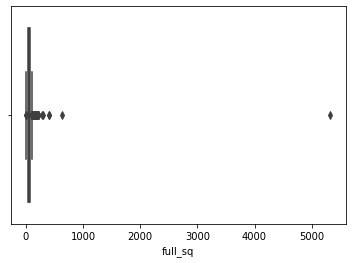

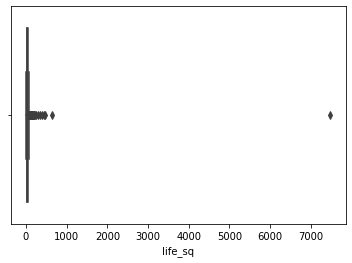

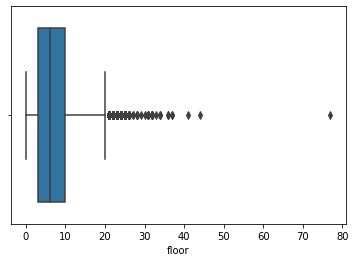

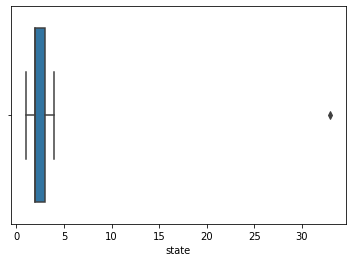

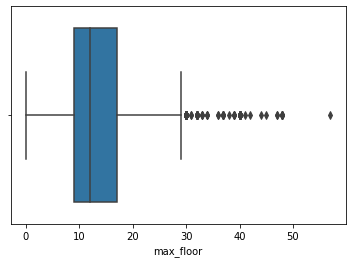

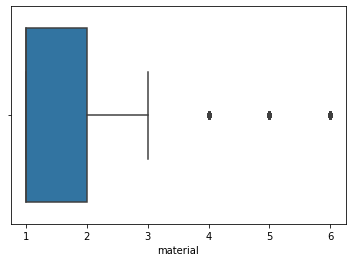

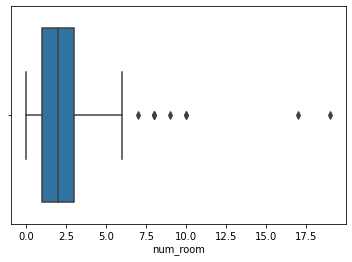

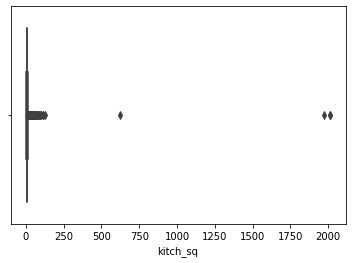

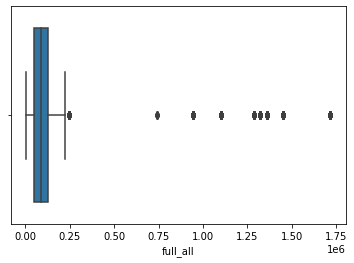

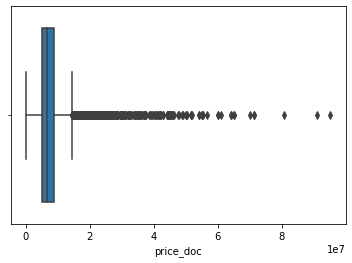

In [28]:
visualize_dataframe(df)

- Явно видно что есть выбросы в full_sq, life_sq, floor, state, kitch_sq, остальное выглядит в общей мере адекватно

- Функция которая будет обнулять выбросы, выходящие за 99.99% процентиль
- Помимо чего добавлю аргумент в функцию roll_num переменный, чтобы обнуление можно было делать несколько разa, некоторые выбросы например в колонне kitch_sq, обнуляются только после второго раза вызова функции

In [29]:
def clear_outliers(dataframe, roll_num=1, high_quantile=0.99, low_quantile=0.01, on_columns=None, ignore_types=['datetime64[ns]', 'object'], ignore_columns=['id']):
    def do_clean(columns_to_clean):
        for column_name in columns_to_clean:
            if dataframe[column_name].dtypes in ignore_types or column_name in ignore_columns:
                continue
            for i in range(roll_num):
                # 99.99% high percentile
                # percentile_high = dataframe[column_name].quantile(0.9999)
                percentile_high = dataframe[column_name].quantile(high_quantile)
                # 0.001% low percentile
                percentile_low = dataframe[column_name].quantile(low_quantile)
                # making outliers obsolete 
                dataframe[column_name] = dataframe[column_name].apply(lambda x: np.nan if x > percentile_high else x)
                dataframe[column_name] = dataframe[column_name].apply(lambda x: np.nan if x < percentile_low else x)
        return dataframe

    if on_columns is not None:
        return do_clean(on_columns)

    all_column_names = dataframe.columns.values
    return do_clean(all_column_names)

In [30]:
df = clear_outliers(df, high_quantile=0.9999, low_quantile=0.0001, roll_num=2)

- Собственно выбрал 99.99% процентиль потому что выбросов у нас не так много и при этом они больше среднего показателя в 100+ раз

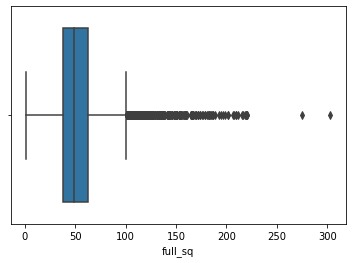

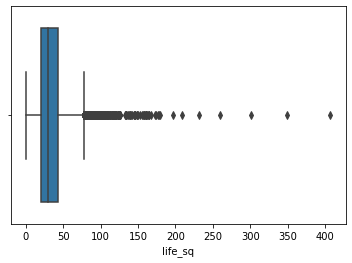

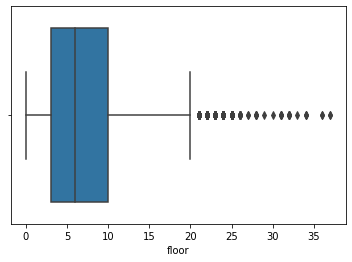

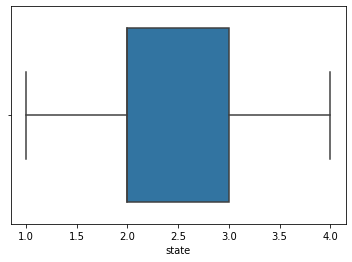

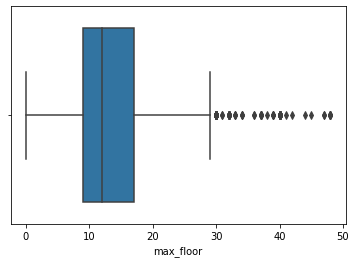

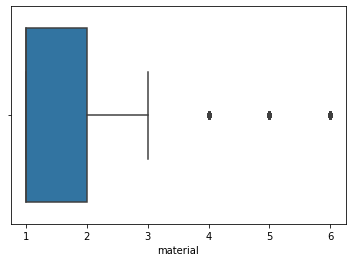

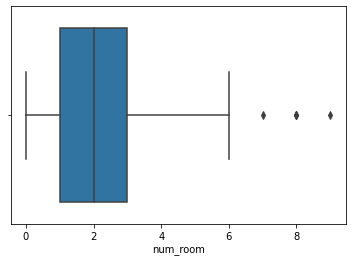

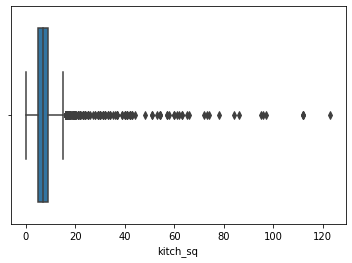

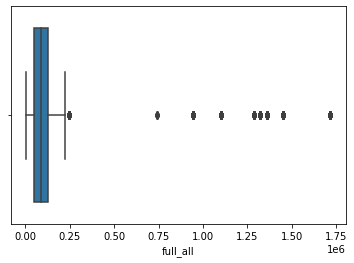

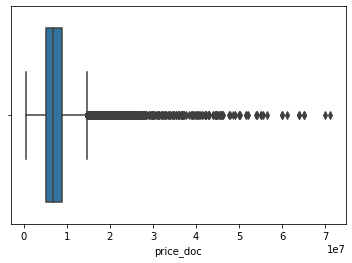

In [31]:
visualize_dataframe(df)

- После обнуления выбросов, собственно видно что данные стали более стабильными, если можно так сказать и более сгруппированы вокруг среднего значения

In [32]:
def count_nan(dataframe):
    column_names = dataframe.columns.values
    for column_name in column_names:
        print(f'{column_name}: {dataframe[column_name].isna().sum()}')

In [33]:
count_nan(df)

id: 0
timestamp: 0
full_sq: 6
life_sq: 1579
floor: 31
state: 3362
max_floor: 1422
material: 1421
build_year: 2905
num_room: 1425
kitch_sq: 1425
full_all: 1
sub_area: 0
price_doc: 7


- Замена пустых значений на среднее значение конкретной колонны

In [34]:
def fill_nan_data(dataframe, ignore_types=['datetime64[ns]', 'object'], ignore_columns=['id']):
    column_names = dataframe.columns.values
    for column_name in column_names:
        if dataframe[column_name].dtypes in ignore_types or column_name in ignore_columns:
            continue
        column_mean = dataframe[column_name].mean()
        dataframe[column_name].fillna(column_mean, inplace=True)
    return dataframe

In [35]:
df = fill_nan_data(df, ignore_columns=['sub_area'])
df.sample(15)

id  timestamp  full_sq  life_sq  floor   state  max_floor  material  \
6210   17179 2014-04-09     45.0   28.000    4.0  3.0000    12.0000    1.0000   
995    10828 2013-09-30     39.0   18.000   13.0  1.0000    17.0000    1.0000   
18204   4331 2012-10-22     61.0   33.746   18.0  2.1993    12.4208    1.8901   
14618  27618 2015-01-30    117.0   74.000    6.0  3.0000     8.0000    2.0000   
9394   21084 2014-07-24     36.0   19.000   14.0  2.0000    17.0000    1.0000   
2783   13014 2013-12-12     51.0   30.000    2.0  2.0000    14.0000    1.0000   
7050   18189 2014-05-06     58.0   41.000    5.0  2.0000     5.0000    1.0000   
2555   12746 2013-12-03     34.0   20.000    8.0  3.0000     9.0000    1.0000   
8704   20230 2014-06-27     40.0   20.000    7.0  3.0000    12.0000    1.0000   
5606   16440 2014-03-24     73.0   44.000   11.0  3.0000    17.0000    1.0000   
5579   16407 2014-03-24     68.0   44.000   12.0  3.0000    14.0000    5.0000   
13057  25652 2014-12-02     55.0   40.000    3.0  3.0000     5.0000    2.0000   
9460   21154 2014-07-29     38.0   19.000    9.0  3.0000    17.0000    1.0000   
2023   12097 2013-11-13     47.0   27.000    5.0  3.0000     9.0000    1.0000   
4536   15137 2014-02-18     60.0   30.000    8.0  3.0000    17.0000    1.0000   

      build_year  num_room  kitch_sq   full_all             sub_area  \
6210  1966-01-01    2.0000    5.0000    76670.0              Zjuzino   
995   2012-01-01    1.0000    9.0000    13890.0  Poselenie Sosenskoe   
18204        NaT    1.9321    6.8285    21155.0               Mitino   
14618 1960-01-01    5.0000   21.0000    75377.0            Hamovniki   
9394  1999-01-01    1.0000    6.0000    60315.0  Severnoe Medvedkovo   
2783  1985-01-01    2.0000    8.0000   142243.0            Lefortovo   
7050  1966-01-01    3.0000    5.0000  1452550.0          Bogorodskoe   
2555  1970-01-01    1.0000    6.0000    78507.0              Kuncevo   
8704  2003-01-01    1.0000    8.0000    89971.0             Ljublino   
5606  1994-01-01    3.0000   10.0000    78616.0      Severnoe Butovo   
5579  1974-01-01    3.0000    9.0000   157010.0           Ivanovskoe   
13057 1964-01-01    3.0000    5.0000   153248.0             Kotlovka   
9460  1998-01-01    1.0000    8.0000    81887.0              Hovrino   
2023  1972-01-01    2.0000    6.0000    81980.0         Jaroslavskoe   
4536  1988-01-01    2.0000    8.0000   125354.0  Chertanovo Severnoe   

        price_doc  
6210   7.7000e+06  
995    4.1750e+06  
18204  8.2485e+06  
14618  3.7000e+07  
9394   7.5000e+06  
2783   2.1000e+06  
7050   7.2500e+06  
2555   6.7000e+06  
8704   5.8000e+06  
5606   1.1750e+07  
5579   9.8000e+06  
13057  8.5000e+06  
9460   7.2000e+06  
2023   6.5000e+06  
4536   9.8000e+06

- Количество пустых значений после замены nan на среднее значение конкретной колонны

In [36]:
count_nan(df)

id: 0
timestamp: 0
full_sq: 0
life_sq: 0
floor: 0
state: 0
max_floor: 0
material: 0
build_year: 2905
num_room: 0
kitch_sq: 0
full_all: 0
sub_area: 0
price_doc: 0


- Визуализируем датафрейм еще раз

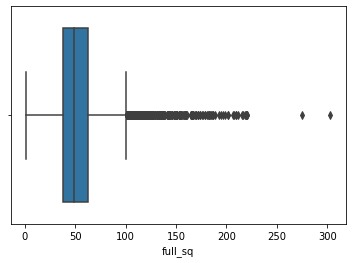

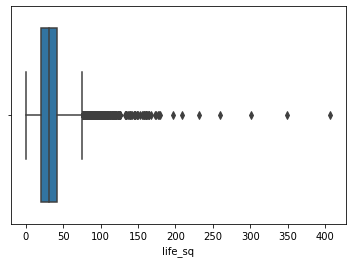

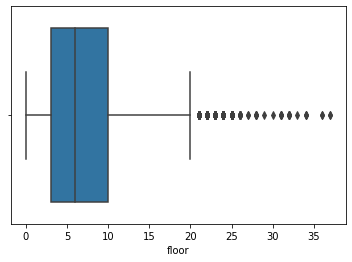

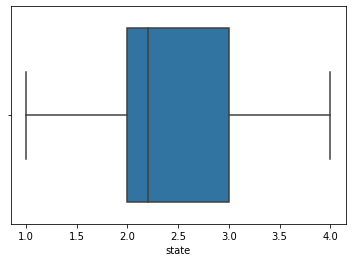

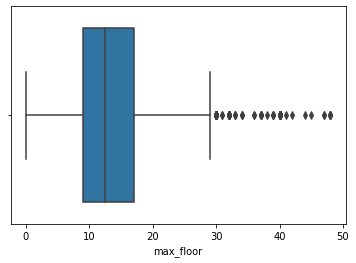

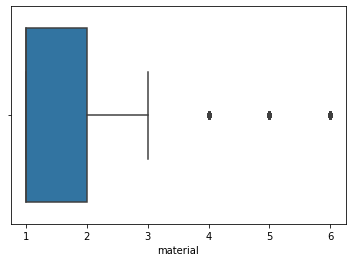

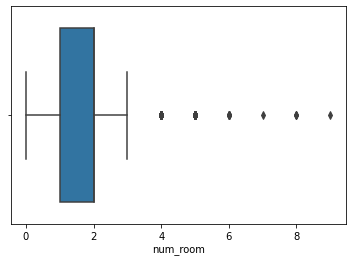

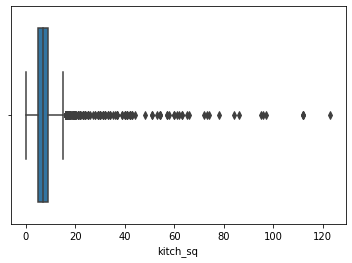

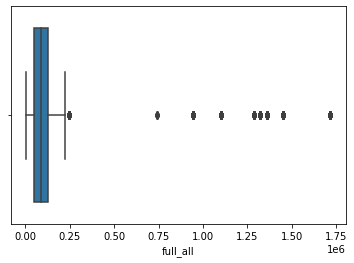

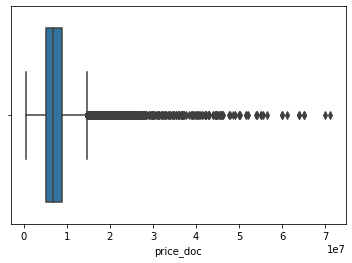

In [37]:
visualize_dataframe(df)

### 1.3.2 Набор с макропоказателями

- В визуализации видно что есть небольшое количество выборосов, но ситуация явно лучше чем в первом датасете

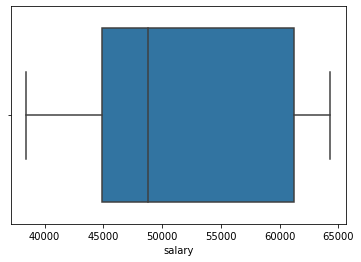

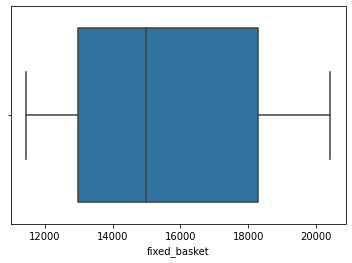

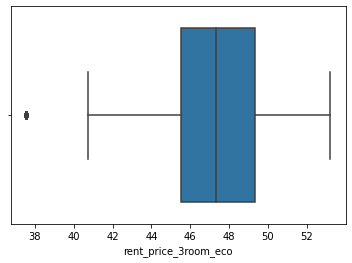

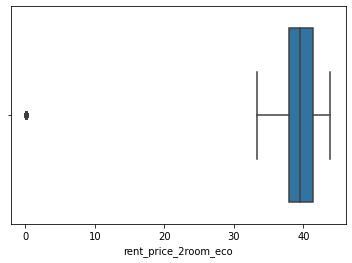

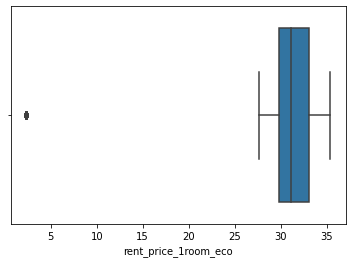

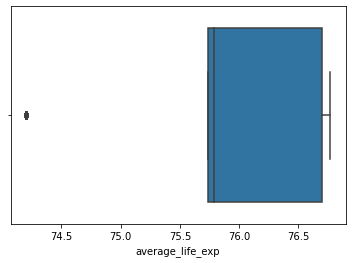

In [38]:
visualize_dataframe(macro)

- Уберем некоторые очевидные выбросы, проигнорируя некоторые колонны в которых максимальные значения адекватные

In [39]:
macro = clear_outliers(macro, low_quantile=0.2, ignore_columns=['rent_price_3room_eco', 'average_life_exp'])

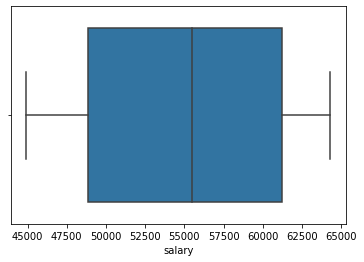

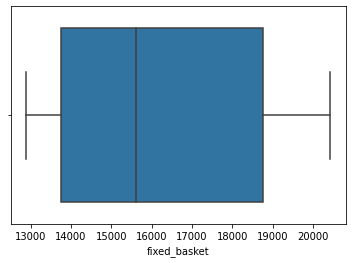

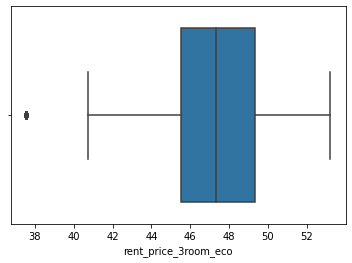

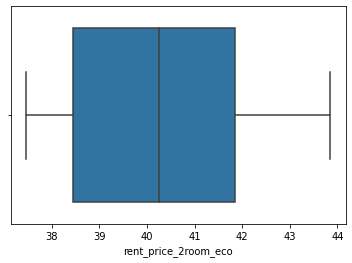

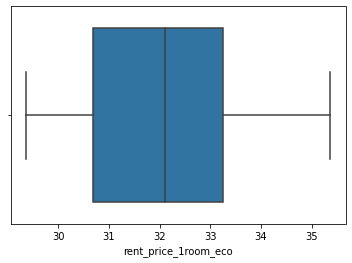

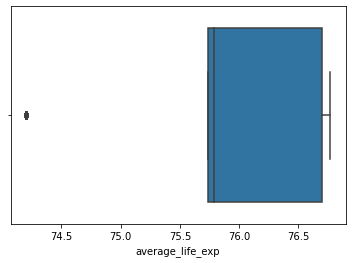

In [40]:
visualize_dataframe(macro)

In [41]:
count_nan(macro)

timestamp: 0
salary: 658
fixed_basket: 485
rent_price_3room_eco: 273
rent_price_2room_eco: 697
rent_price_1room_eco: 700
average_life_exp: 293


In [42]:
macro = fill_nan_data(macro)
macro.sample(15)

timestamp      salary  fixed_basket  rent_price_3room_eco  \
2292 2016-04-11  54943.1106    19904.3100               47.9700   
1232 2013-05-17  55485.2000    14983.9200               47.3500   
1534 2014-03-15  61208.0000    15916.8800               49.7500   
1860 2015-02-04  64310.0000    18295.0700               51.4900   
2006 2015-06-30  64310.0000    18720.6500               49.0100   
1651 2014-07-10  61208.0000    16251.4100               50.9300   
1370 2013-10-02  55485.2000    15285.6500               48.2800   
1061 2012-11-27  48830.4000    13872.8200               48.9700   
789  2012-02-29  48830.4000    13166.8800               45.5300   
866  2012-05-16  48830.4000    13350.3200               44.5700   
2184 2015-12-25  64310.0000    19274.4200               49.4200   
1124 2013-01-29  55485.2000    14289.4000               45.2000   
880  2012-05-30  48830.4000    13350.3200               44.5700   
2103 2015-10-05  64310.0000    19140.8700               49.6700   
83   2010-03-25  54943.1106    16131.2946               47.2997   

      rent_price_2room_eco  rent_price_1room_eco  average_life_exp  
2292               40.2572               32.0755           75.9282  
1232               40.7700               32.0755           76.3700  
1534               41.9100               33.2600           76.7000  
1860               41.8600               34.3500           76.7700  
2006               38.9100               30.2900           76.7700  
1651               41.9700               33.6700           76.7000  
1370               41.9600               34.5200           76.3700  
1061               40.8300               32.9300           75.7400  
789                38.3900               31.1200           75.7400  
866                37.9600               30.6700           75.7400  
2184               40.0900               30.3700           76.7700  
1124               40.2500               32.8400           76.3700  
880                37.9600               30.6700           75.7400  
2103               38.8400               30.4100           76.7700  
83                 40.2572               32.0755           74.2000

In [43]:
count_nan(macro)

timestamp: 0
salary: 0
fixed_basket: 0
rent_price_3room_eco: 0
rent_price_2room_eco: 0
rent_price_1room_eco: 0
average_life_exp: 0


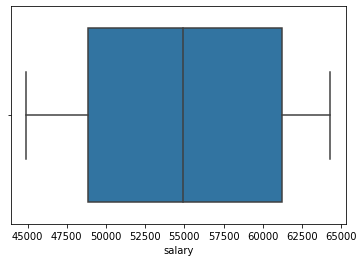

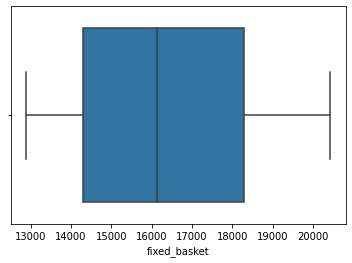

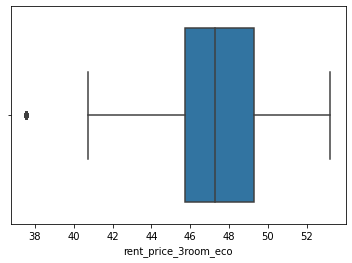

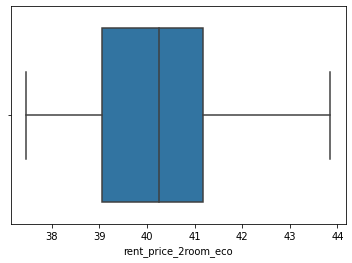

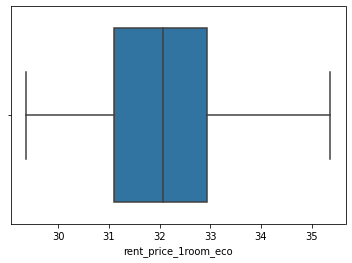

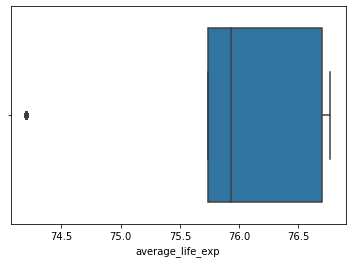

In [44]:
visualize_dataframe(macro)

- После махинаций со средними и пустыми значениями почти ничего не изменилось, только ушли аномальные выбросы

## 1.4 Обогатите основной набор данных данными из макропоказателей и поместите в переменную `df_full`

In [45]:
df.head(5)

id  timestamp  full_sq  life_sq  floor   state  max_floor  material  \
0  8059 2013-05-21     11.0     11.0    2.0  3.0000        5.0       2.0   
1  8138 2013-05-25     53.0     30.0   10.0  3.0000       16.0       1.0   
2  8156 2013-05-27     77.0     41.0    2.0  1.0000       17.0       6.0   
3  8157 2013-05-27     45.0     27.0    6.0  3.0000        9.0       1.0   
4  8178 2013-05-28     38.0     20.0   15.0  2.1993       16.0       1.0   

  build_year  num_room  kitch_sq  full_all                 sub_area  price_doc  
0 1907-01-01       1.0      12.0   75377.0                Hamovniki  2750000.0  
1 1980-01-01       2.0       8.0   68630.0                Lianozovo  9000000.0  
2 2014-01-01       3.0      12.0    9553.0  Poselenie Voskresenskoe  7011550.0  
3 1970-01-01       2.0       6.0   78616.0          Severnoe Butovo  7100000.0  
4 1982-01-01       1.0       8.0  112804.0           Filevskij Park  6450000.0

In [46]:
df.shape

(18866, 14)

In [47]:
macro.head(5)

timestamp      salary  fixed_basket  rent_price_3room_eco  \
0 2010-01-01  54943.1106    16131.2946               47.2997   
1 2010-01-02  54943.1106    16131.2946               47.2997   
2 2010-01-03  54943.1106    16131.2946               47.2997   
3 2010-01-04  54943.1106    16131.2946               47.2997   
4 2010-01-05  54943.1106    16131.2946               47.2997   

   rent_price_2room_eco  rent_price_1room_eco  average_life_exp  
0               40.2572               32.0755              74.2  
1               40.2572               32.0755              74.2  
2               40.2572               32.0755              74.2  
3               40.2572               32.0755              74.2  
4               40.2572               32.0755              74.2

In [48]:
macro.shape

(2484, 7)

In [49]:
df_full = df.merge(macro, on='timestamp', how='left')

In [50]:
df_full.head(5)

id  timestamp  full_sq  life_sq  floor   state  max_floor  material  \
0  8059 2013-05-21     11.0     11.0    2.0  3.0000        5.0       2.0   
1  8138 2013-05-25     53.0     30.0   10.0  3.0000       16.0       1.0   
2  8156 2013-05-27     77.0     41.0    2.0  1.0000       17.0       6.0   
3  8157 2013-05-27     45.0     27.0    6.0  3.0000        9.0       1.0   
4  8178 2013-05-28     38.0     20.0   15.0  2.1993       16.0       1.0   

  build_year  num_room  kitch_sq  full_all                 sub_area  \
0 1907-01-01       1.0      12.0   75377.0                Hamovniki   
1 1980-01-01       2.0       8.0   68630.0                Lianozovo   
2 2014-01-01       3.0      12.0    9553.0  Poselenie Voskresenskoe   
3 1970-01-01       2.0       6.0   78616.0          Severnoe Butovo   
4 1982-01-01       1.0       8.0  112804.0           Filevskij Park   

   price_doc   salary  fixed_basket  rent_price_3room_eco  \
0  2750000.0  55485.2      14983.92                 47.35   
1  9000000.0  55485.2      14983.92                 47.35   
2  7011550.0  55485.2      14983.92                 47.35   
3  7100000.0  55485.2      14983.92                 47.35   
4  6450000.0  55485.2      14983.92                 47.35   

   rent_price_2room_eco  rent_price_1room_eco  average_life_exp  
0                 40.77               32.0755             76.37  
1                 40.77               32.0755             76.37  
2                 40.77               32.0755             76.37  
3                 40.77               32.0755             76.37  
4                 40.77               32.0755             76.37

In [51]:
df_full.shape

(18866, 20)

In [52]:
df_full.describe()

id     full_sq     life_sq       floor       state   max_floor  \
count  18866.0000  18866.0000  18866.0000  18866.0000  18866.0000  18866.0000   
mean   18799.7886     53.5985     33.7460      7.2863      2.1993     12.4208   
std     7082.4287     21.0011     17.8515      5.1497      0.7399      6.0300   
min        9.0000      1.0000      0.0000      0.0000      1.0000      0.0000   
25%    13513.2500     38.0000     20.0000      3.0000      2.0000      9.0000   
50%    19043.5000     49.0000     31.0000      6.0000      2.1993     12.4208   
75%    24748.7500     63.0000     42.0000     10.0000      3.0000     17.0000   
max    30473.0000    303.0000    407.0000     37.0000      4.0000     48.0000   

         material    num_room    kitch_sq    full_all   price_doc      salary  \
count  18866.0000  18866.0000  18866.0000  1.8866e+04  1.8866e+04  18866.0000   
mean       1.8901      1.9321      6.8285  1.5972e+05  7.5673e+06  59882.2021   
std        1.4482      0.8100      4.6199  3.0435e+05  4.8533e+06   3718.2141   
min        1.0000      0.0000      0.0000  2.6930e+03  5.0000e+05  44898.7000   
25%        1.0000      1.0000      5.0000  4.8439e+04  5.1000e+06  55485.2000   
50%        1.0000      2.0000      6.8285  8.7713e+04  6.6900e+06  61208.0000   
75%        2.0000      2.0000      9.0000  1.2535e+05  8.9000e+06  61208.0000   
max        6.0000      9.0000    123.0000  1.7167e+06  7.1200e+07  64310.0000   

       fixed_basket  rent_price_3room_eco  rent_price_2room_eco  \
count    18866.0000            18866.0000            18866.0000   
mean     16215.5343               49.8407               41.7767   
std       1161.5241                1.8440                1.2149   
min      12922.9700               43.4200               37.7300   
25%      15417.3400               48.7000               41.1700   
50%      16165.3000               49.7500               41.9100   
75%      16648.7000               50.9300               42.6400   
max      18745.2800               53.2100               43.8500   

       rent_price_1room_eco  average_life_exp  
count            18866.0000        18866.0000  
mean                33.5046           76.5993  
std                  1.1631            0.2299  
min                 30.2900           75.7400  
25%                 32.9600           76.3700  
50%                 33.6500           76.7000  
75%                 34.3500           76.7000  
max                 35.3700           76.7700

## 1.5 Проверьте данные на наличие выбросов. По каждому столбцу. Напишите своё мнение: нужно ли в каждой из ситуаций обрабатывать выбросы, или можно оставить. Если нужно обработать, то примените один из изученных подходов, либо предложите свой

### 1.5.1 Главный набор данных

- С выбросами было уже немного работы до этого, но можно на всякий случай посчитать процентное количество информации которая может считаться выбросом

In [53]:
def iqr_percent_detection(dataframe):
    num_column_names = dataframe.select_dtypes('number').columns.values
    for col_name in num_column_names:
        # skipping id column
        if col_name in ['id']:
            continue
        q1 = dataframe[col_name].quantile(0.25)
        q3 = dataframe[col_name].quantile(0.75)
        iqr = q3 - q1
        outliers = np.where((dataframe[col_name] < (q1 - 1.5 * iqr)) | (dataframe[col_name] > (q3 + 1.5 * iqr)))
        print(f"{col_name} column outliers percent ratio: {len(outliers[0]) / dataframe[col_name].shape[0] * 100}")

In [54]:
iqr_percent_detection(df)

full_sq column outliers percent ratio: 2.963002226227075
life_sq column outliers percent ratio: 3.0743135799851586
floor column outliers percent ratio: 2.0990140994381425
state column outliers percent ratio: 0.0
max_floor column outliers percent ratio: 0.6148627159970317
material column outliers percent ratio: 17.338068482985264
num_room column outliers percent ratio: 2.332237888264603
kitch_sq column outliers percent ratio: 1.3728400296830277
full_all column outliers percent ratio: 8.645181808544471
price_doc column outliers percent ratio: 5.941906074419591


- Сильных выбросов не наблюдается

### 1.5.2 Набор с макропоказателями

In [55]:
iqr_percent_detection(macro)

salary column outliers percent ratio: 0.0
fixed_basket column outliers percent ratio: 0.0
rent_price_3room_eco column outliers percent ratio: 1.247987117552335
rent_price_2room_eco column outliers percent ratio: 0.0
rent_price_1room_eco column outliers percent ratio: 0.0
average_life_exp column outliers percent ratio: 14.69404186795491


- Также как и до этого, данный датасет был более чистым по сравнению с первым df, так что проблем не наблюдается
- Только в колонне average_life_exp есть что-то похожее на выброс, но как видно из предыдущей визуализации, данное значение в принципе адекватное

## 1.6 Создайте не менее 5 новых признаков на основе существующих данных. Опишите текстом обоснование создания каждой. Признаки должны привносить некую новую информацию для понимания цены квартиры

In [56]:
df_full_backup = df_full.copy()

In [57]:
# just to be safe
# df_full = df_full_backup.copy()

In [58]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18866 entries, 0 to 18865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    18866 non-null  int64         
 1   timestamp             18866 non-null  datetime64[ns]
 2   full_sq               18866 non-null  float64       
 3   life_sq               18866 non-null  float64       
 4   floor                 18866 non-null  float64       
 5   state                 18866 non-null  float64       
 6   max_floor             18866 non-null  float64       
 7   material              18866 non-null  float64       
 8   build_year            15961 non-null  datetime64[ns]
 9   num_room              18866 non-null  float64       
 10  kitch_sq              18866 non-null  float64       
 11  full_all              18866 non-null  float64       
 12  sub_area              18866 non-null  object        
 13  price_doc       

In [59]:
df_full.describe()

id     full_sq     life_sq       floor       state   max_floor  \
count  18866.0000  18866.0000  18866.0000  18866.0000  18866.0000  18866.0000   
mean   18799.7886     53.5985     33.7460      7.2863      2.1993     12.4208   
std     7082.4287     21.0011     17.8515      5.1497      0.7399      6.0300   
min        9.0000      1.0000      0.0000      0.0000      1.0000      0.0000   
25%    13513.2500     38.0000     20.0000      3.0000      2.0000      9.0000   
50%    19043.5000     49.0000     31.0000      6.0000      2.1993     12.4208   
75%    24748.7500     63.0000     42.0000     10.0000      3.0000     17.0000   
max    30473.0000    303.0000    407.0000     37.0000      4.0000     48.0000   

         material    num_room    kitch_sq    full_all   price_doc      salary  \
count  18866.0000  18866.0000  18866.0000  1.8866e+04  1.8866e+04  18866.0000   
mean       1.8901      1.9321      6.8285  1.5972e+05  7.5673e+06  59882.2021   
std        1.4482      0.8100      4.6199  3.0435e+05  4.8533e+06   3718.2141   
min        1.0000      0.0000      0.0000  2.6930e+03  5.0000e+05  44898.7000   
25%        1.0000      1.0000      5.0000  4.8439e+04  5.1000e+06  55485.2000   
50%        1.0000      2.0000      6.8285  8.7713e+04  6.6900e+06  61208.0000   
75%        2.0000      2.0000      9.0000  1.2535e+05  8.9000e+06  61208.0000   
max        6.0000      9.0000    123.0000  1.7167e+06  7.1200e+07  64310.0000   

       fixed_basket  rent_price_3room_eco  rent_price_2room_eco  \
count    18866.0000            18866.0000            18866.0000   
mean     16215.5343               49.8407               41.7767   
std       1161.5241                1.8440                1.2149   
min      12922.9700               43.4200               37.7300   
25%      15417.3400               48.7000               41.1700   
50%      16165.3000               49.7500               41.9100   
75%      16648.7000               50.9300               42.6400   
max      18745.2800               53.2100               43.8500   

       rent_price_1room_eco  average_life_exp  
count            18866.0000        18866.0000  
mean                33.5046           76.5993  
std                  1.1631            0.2299  
min                 30.2900           75.7400  
25%                 32.9600           76.3700  
50%                 33.6500           76.7000  
75%                 34.3500           76.7000  
max                 35.3700           76.7700

In [60]:
df_full.sample(5)

id  timestamp  full_sq  life_sq  floor   state  max_floor  material  \
17286   5499 2012-12-26     60.0     55.0   14.0  2.1993    12.4208    1.8901   
12866  25420 2014-11-27     42.0     42.0    1.0  1.0000     7.0000    1.0000   
11320  23428 2014-10-09     77.0     43.0    9.0  3.0000    17.0000    1.0000   
16824  30420 2015-06-25     50.0     32.0    2.0  2.0000     5.0000    2.0000   
13332  26015 2014-12-08     82.0     82.0    8.0  1.0000    17.0000    1.0000   

      build_year  num_room  kitch_sq  full_all                 sub_area  \
17286        NaT    1.9321    6.8285    9553.0  Poselenie Voskresenskoe   
12866 2014-01-01    1.0000   10.0000   21819.0   Poselenie Desjonovskoe   
11320 2003-01-01    3.0000   12.0000  125111.0                 Solncevo   
16824 1960-01-01    3.0000    5.0000   19940.0           Nizhegorodskoe   
13332 2015-01-01    3.0000   10.0000   13890.0      Poselenie Sosenskoe   

        price_doc   salary  fixed_basket  rent_price_3room_eco  \
17286  5.0829e+06  48830.4      13948.20                 46.94   
12866  4.4253e+06  61208.0      16648.70                 53.21   
11320  1.2000e+07  61208.0      16269.79                 52.82   
16824  1.0000e+06  64310.0      18720.65                 49.01   
13332  8.8981e+06  61208.0      16910.54                 49.89   

       rent_price_2room_eco  rent_price_1room_eco  average_life_exp  
17286                 41.01                 33.10             75.74  
12866                 43.23                 34.30             76.70  
11320                 43.85                 35.37             76.70  
16824                 38.91                 30.29             76.77  
13332                 42.64                 34.33             76.70

- 1) признак price_per_square: цена за квадратный метр

In [61]:
df_full['price_per_square'] = df_full['price_doc'] / df_full['full_sq']

- 2) признак material_worth: весомость цены материала из которого изготовлена единица

In [62]:
df_full['material_worth'] = df_full['price_doc'] / df_full['material']

- перевод строчного названия района в его числовой эквивалент

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()
label = le.fit_transform(df_full['sub_area'])

In [65]:
df_full.drop('sub_area', axis=1, inplace=True)
df_full['sub_area'] = label

- 3) sub_area_prestige: престижность района как отношение его локации к стоимости единицы

In [66]:
df_full['sub_area_prestige'] = df_full['price_doc'] / df_full['sub_area']

- 4) region_life_cost: зависимость между зарплатой и потребительской корзиной, показывающий общую стоимость проживания

In [67]:
df_full['region_life_cost'] = df_full['salary'] / df_full['fixed_basket']

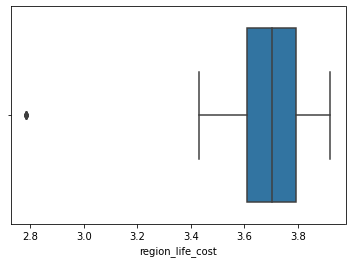

In [68]:
sns.boxplot(data=df_full, x='region_life_cost')

- Наблюдается небольшой выброс, избавимся на всякий случай

In [69]:
df_full = clear_outliers(df_full, on_columns=['region_life_cost'])

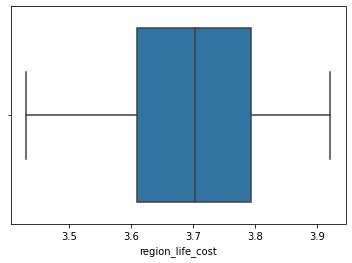

In [70]:
sns.boxplot(data=df_full, x='region_life_cost')

- 5) max_floor_price_impact: зависимость между количеством этажей в здании в котором продается квартира, и ее ценой

In [71]:
df_full['max_floor_price_impact'] = df_full['max_floor'] / df_full['price_doc']

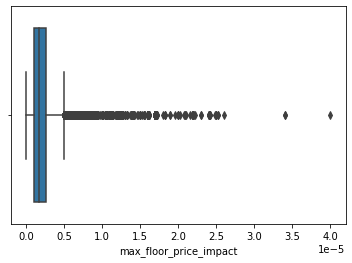

In [72]:
sns.boxplot(data=df_full, x='max_floor_price_impact')

- Тоже избавимся от пары выбросов

In [73]:
df_full = clear_outliers(df_full, on_columns=['max_floor_price_impact'])

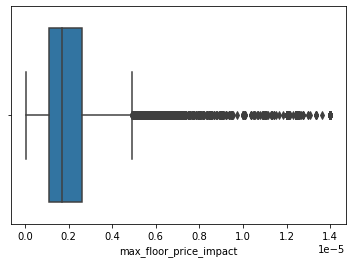

In [74]:
sns.boxplot(data=df_full, x='max_floor_price_impact')

- В поле build_year наблюдается выброс, который я нашел уже под конец выполнения проекта, при шаге 1.7.1.7, скорее всего минимальное значение года не 1691, а 1961, тк большинство домов было построено в 60-х
- Поменяю значение, избавившись от выброса

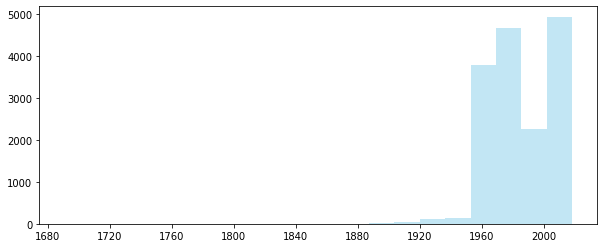

In [75]:
fig = plt.figure(figsize=(10, 4))
plt.hist(df_full['build_year'], bins=20, color='skyblue', alpha=0.5, histtype='bar')
plt.show()

In [76]:
build_year_outlier_index = df_full['build_year'].idxmin()
df_full = df_full.drop([build_year_outlier_index])

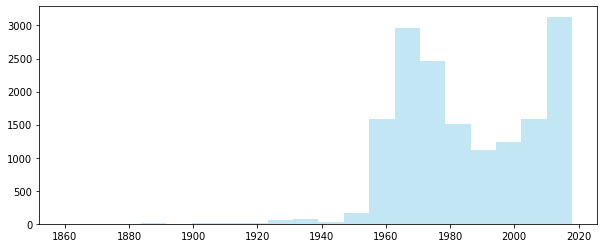

In [77]:
fig = plt.figure(figsize=(10, 4))
plt.hist(df_full['build_year'], bins=20, color='skyblue', alpha=0.5, histtype='bar')
plt.show()

- Выглядит лучше

- 6) building_novelty: предположение что здание оснащено современными технологиями исходя из года постройки

In [78]:
df_full['building_novelty'] = df_full['build_year'].apply(lambda x: True if x.year > 2010 else False)

In [79]:
df_full.sample(5)

id  timestamp  full_sq  life_sq  floor   state  max_floor  material  \
16893  21792 2014-08-22     27.0   33.746    8.0  2.1993       19.0       1.0   
2720   12940 2013-12-09     43.0   27.000    5.0  3.0000        5.0       2.0   
10581  22505 2014-09-15     58.0   45.000    3.0  3.0000        9.0       1.0   
6631   17679 2014-04-22     29.0   17.000    3.0  2.0000        9.0       2.0   
8397   19839 2014-06-19     52.0   17.000   13.0  3.0000       27.0       4.0   

      build_year  num_room  kitch_sq  full_all  price_doc   salary  \
16893        NaT       1.0       0.0   39873.0  2689984.0  61208.0   
2720  1964-01-01       2.0       5.0   57405.0  6400000.0  55485.2   
10581 1968-01-01       3.0       5.0   12327.0  7700000.0  61208.0   
6631  1969-01-01       1.0       5.0  115352.0  5800000.0  61208.0   
8397  2011-01-01       1.0      13.0  155427.0  6000000.0  61208.0   

       fixed_basket  rent_price_3room_eco  rent_price_2room_eco  \
16893      16134.39                 52.81                 43.11   
2720       15417.34                 48.50                 42.00   
10581      16165.30                 51.41                 43.26   
6631       16041.58                 49.32                 40.95   
8397       16295.00                 48.70                 41.18   

       rent_price_1room_eco  average_life_exp  price_per_square  \
16893                 34.83             76.70        99629.0370   
2720                  33.97             76.37       148837.2093   
10581                 34.52             76.70       132758.6207   
6631                  32.96             76.70       200000.0000   
8397                  33.06             76.70       115384.6154   

       material_worth  sub_area  sub_area_prestige  region_life_cost  \
16893       2689984.0       101         26633.5050            3.7936   
2720        3200000.0       106         60377.3585            3.5989   
10581       7700000.0        27        285185.1852            3.7864   
6631        2900000.0        71         81690.1408            3.8156   
8397        1500000.0        30        200000.0000            3.7562   

       max_floor_price_impact  building_novelty  
16893              7.0632e-06             False  
2720               7.8125e-07             False  
10581              1.1688e-06             False  
6631               1.5517e-06             False  
8397               4.5000e-06              True

- Так как я обнулял некоторые выбросы, заменим их значения NaN на среднее

In [80]:
count_nan(df_full)

id: 0
timestamp: 0
full_sq: 0
life_sq: 0
floor: 0
state: 0
max_floor: 0
material: 0
build_year: 2905
num_room: 0
kitch_sq: 0
full_all: 0
price_doc: 0
salary: 0
fixed_basket: 0
rent_price_3room_eco: 0
rent_price_2room_eco: 0
rent_price_1room_eco: 0
average_life_exp: 0
price_per_square: 0
material_worth: 0
sub_area: 0
sub_area_prestige: 0
region_life_cost: 8
max_floor_price_impact: 370
building_novelty: 0


In [81]:
df_full = fill_nan_data(df_full)

In [82]:
count_nan(df_full)

id: 0
timestamp: 0
full_sq: 0
life_sq: 0
floor: 0
state: 0
max_floor: 0
material: 0
build_year: 2905
num_room: 0
kitch_sq: 0
full_all: 0
price_doc: 0
salary: 0
fixed_basket: 0
rent_price_3room_eco: 0
rent_price_2room_eco: 0
rent_price_1room_eco: 0
average_life_exp: 0
price_per_square: 0
material_worth: 0
sub_area: 0
sub_area_prestige: 0
region_life_cost: 0
max_floor_price_impact: 0
building_novelty: 0


## 1.7 Провести визуальный анализ всех признаков

Ко всем графикам писать выводы текстом. Что вы видите, почему построили именно такую диаграмму

### 1.7.1 Анализ признаков по отдельности (где нужно делать группировки, преобразования категориальных типов данных к числовым, смотреть в разрезе других категориальных признаков)

### Создадим тепловую карту для выделения моментов на которые стоит обратить внимание

In [83]:
df_full_visual = df_full.copy()
df_full_visual.drop(labels=['id'], axis=1, inplace=True)

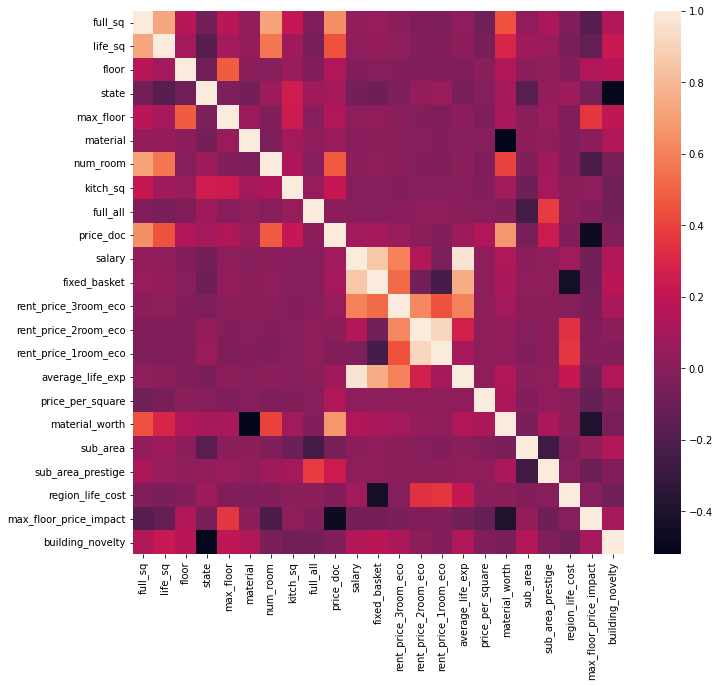

In [84]:
fig, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(df_full_visual.corr(), annot=False)
plt.show()

### Из тепловой карты можно визуально выделить несколько корреляционных моментов:

1. full_sq - life_sq: больше общая площадь -> больше жилая площадь
2. full_sq - num_room: больше общая площадь -> больше комнат
3. full_sq - price_doc: больше общая площадь -> больше цена за объект
4. price_doc - num_room: больше цена за объект -> больше комнат
5. life_sq - num_room: больше жилая площадь -> больше комнат
6. life_sq - price_doc: больше жилая площадь -> больше цена за объект
7. max_floor - floor: больше максимальный этаж в котором расположена квартира -> больше шанс что сама квартира будет находиться на более высоком этаже
8. material_worth - price_doc: более дорогой материал -> больше цена за объект
9. salary - average_life_exp: больше зарпала -> дольше живет человек, и наоборот
10. salary - fixed_basket: больше зарплата -> больше человек может потратить на прожиточную корзину
11. average_life_exp - fixed_basket: до этого, зарплата выше -> дольше жизнь -> более качественные продукты -> больше цена корзины
12. average_life_exp - rent_price_3room_eco: здесь есть корреляция, но нет зависимости, на тепловой карте есть более выделенный участок, но не думаю что одно зависит от другого
13. average_life_exp - rent_price_2room_eco: как и предыдущий пункт
14. average_life_exp - rent_price_1room_eco: как и предыдущий пункт

Некоторые более интересные моменты описаны и визуализированы ниже

### Функции для визузации

In [85]:
# function for histogram plotting
def hist_plot_columns(dataframe, cols, num=10):
    for col in dataframe[cols]:
        fig, ax = plt.subplots(figsize=(25,6))
        sns.histplot(data=dataframe, x=col, bins=20, kde=True, color='blue')
        ax.set_title(col, size=15)
        start = dataframe[col].min()
        end = dataframe[col].max()
        ax.set_xticks(np.linspace(start, end, num))
        plt.show()

In [86]:
from scipy.stats import linregress


# function for scatter plotting and linear regression line
def scatter_plot_regr_columns(dataframe, col_a, col_b):
    fig = plt.figure(figsize=(14, 6))

    plt.scatter(dataframe[col_a], dataframe[col_b])
    plt.xlabel(col_a)
    plt.ylabel(col_b)

    slope, intercept, r_value, p_value, std_err = linregress(dataframe[col_a], dataframe[col_b])
    line = [slope*xi + intercept for xi in dataframe[col_a]]
    plt.plot(dataframe[col_a], line, 'r-', linewidth=2)

    plt.show()

In [87]:
def box_plot_columns(dataframe, cols, orientation='h'):
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.boxplot(data=df_full[cols], orient=orientation)
    plt.show()

### 1.7.1.1 Выводы между значениями price_doc / full_sq / life_sq / num_room

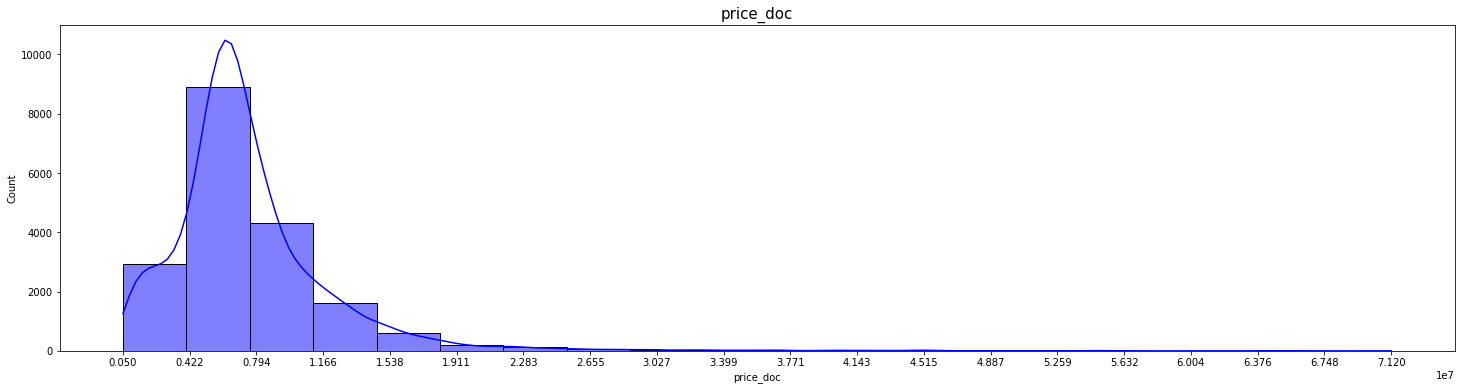

In [88]:
hist_plot_columns(df_full, ['price_doc'], num = 20)

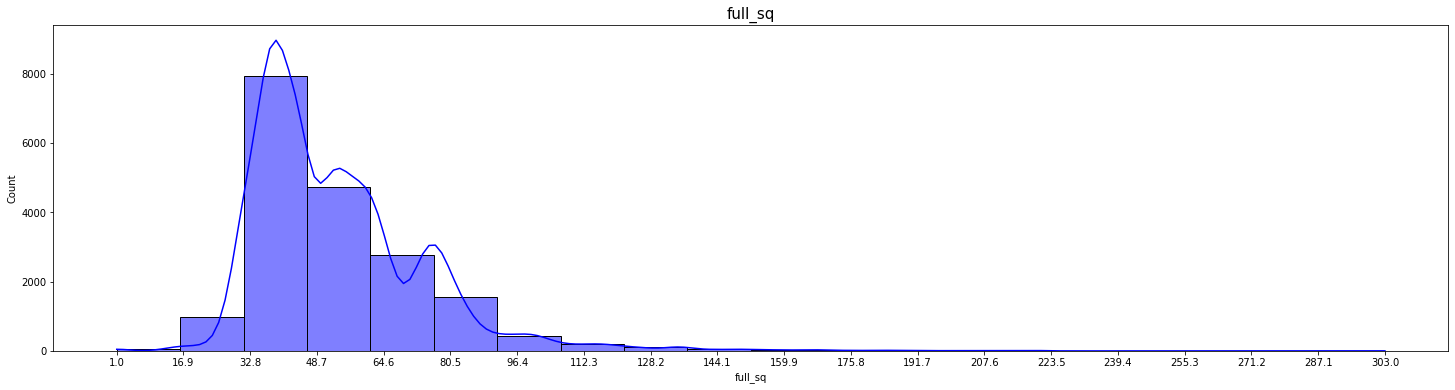

In [89]:
hist_plot_columns(df_full, ['full_sq'], num = 20)

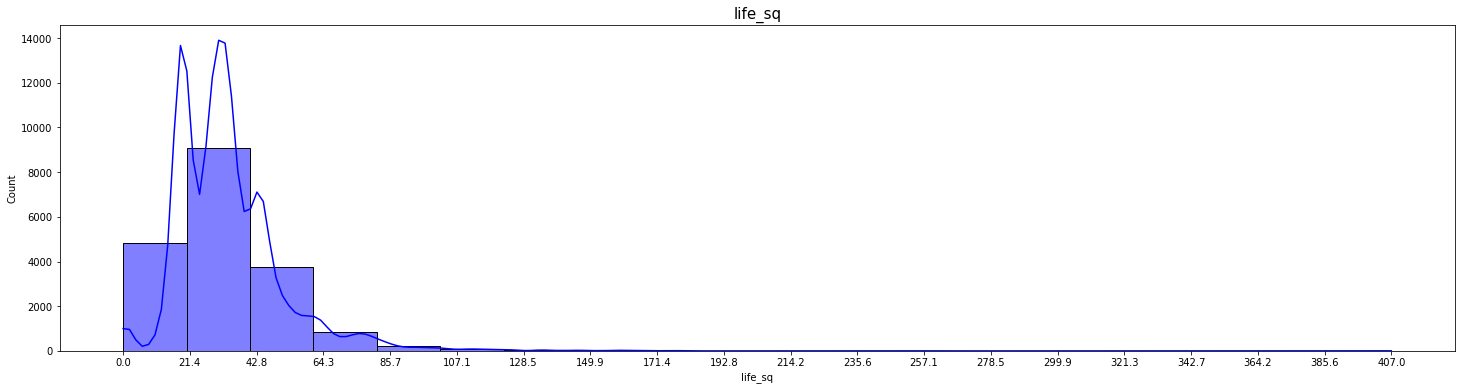

In [90]:
hist_plot_columns(df_full, ['life_sq'], num = 20)

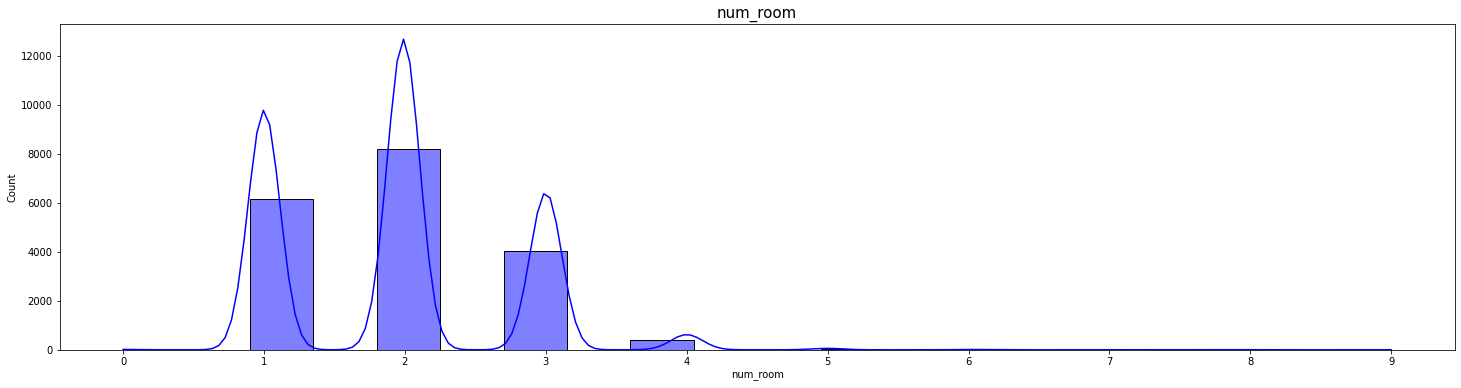

In [91]:
hist_plot_columns(df_full, ['num_room'])

- На данных графиках можно увидеть, что большинство площадей квартир приходится на 30-60 единиц и при этом большинство жилого пространства имеют площадь 15 - ~45 единиц, из этого можно сделать вывод о том что большинство квартир имеют прямую зависимость - чем больше общая площадь - тем больше жилое пространство, и большинство квартин не очень большие, помимо чего, если приглядеться ближе к значениям от 70 на обоих графиках, то жилая площадь несоизмеримо падает по отношению к общей, скорее всего от того, что общая площадь выделена под что-то другое.
- Зависимость между общей площадью и количеством комнат в принципе не нужно объяснять - больше общая площадь - больше комнат, все прямолинейно, изображено двумя отдельными графиками, по причине того что количество значений по оси абсцисс сильно различаются в велиине
- Больше цена по документам - больше жилая площадь и количество комнат, логично было бы изобразить две гистограммы одна на другой, но визуализация выглядит слишком плохо из-за разных масштабов в значениях, если можно так сказать

### 1.7.1.2 max_floor - floor

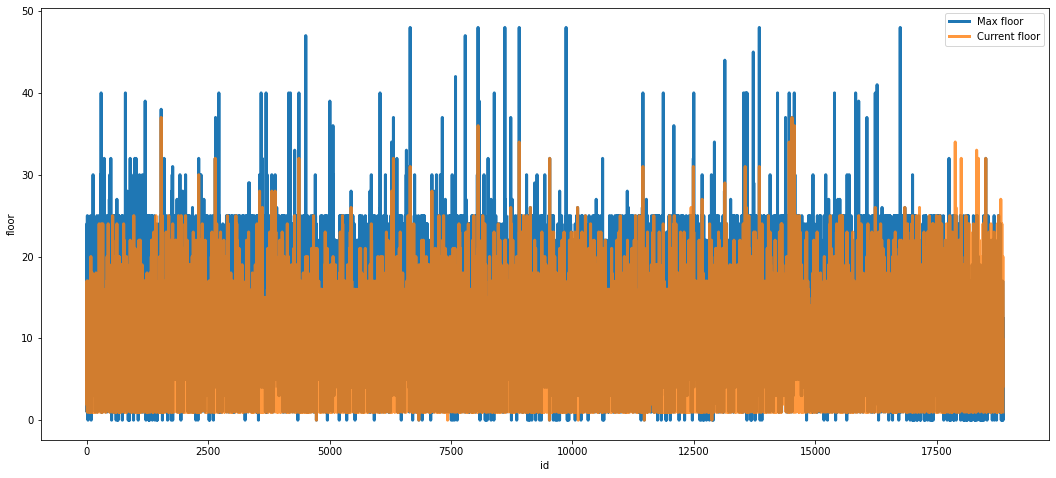

In [92]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(df_full['max_floor'], lw=3, alpha=1, label='Max floor')
ax.plot(df_full['floor'], lw=3, alpha=0.8, label='Current floor')

ax.set_xlabel('id')
ax.set_ylabel('floor')

ax.legend()

plt.show()

Квартиры на максимальных этажах не всегда популярны из-за большей цены, что видно на графике, примерно в 90% случаях этаж на котором находится квартира меньше чем максимальный этаж здания в котором эта квартира находится

### 1.7.1.3 average_life_exp - salary / fixed_basket

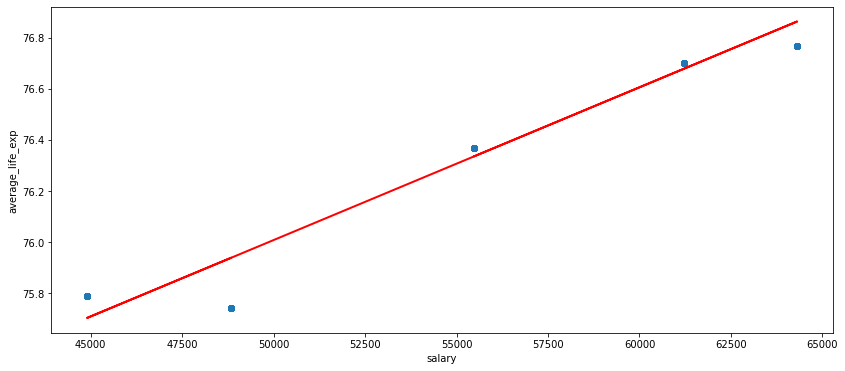

In [93]:
scatter_plot_regr_columns(df_full, 'salary', 'average_life_exp')

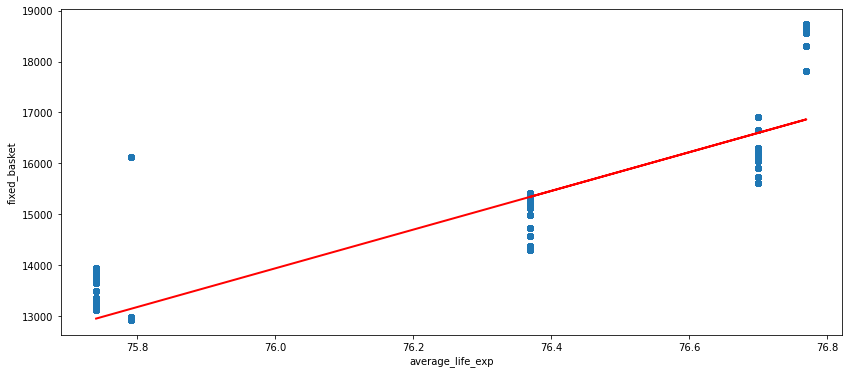

In [94]:
scatter_plot_regr_columns(df_full, 'average_life_exp', 'fixed_basket')

Добавил линию линейной регрессии чтобы явно увидеть линейную зависимость между average_life_exp и salary, можно сделать вывод о том что, чем больше человек в среднем зарабатывает, тем дольше живет

### 1.7.1.4 salary - fixed_basket

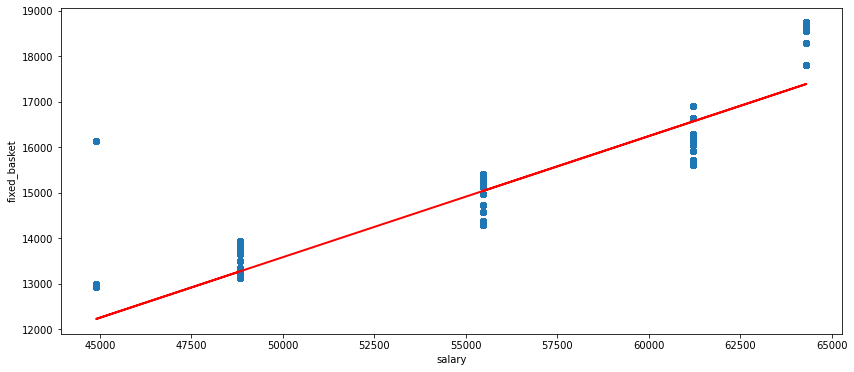

In [95]:
scatter_plot_regr_columns(df_full, 'salary', 'fixed_basket')

- Здесь тоже наблюдается линейная зависимость между зарплатой и потребительской корзиной, что логично, больше зарабатывает человек - больше может позволить себе купить продуктов или продукты лучшего качества
- Однако в точках на графике наблюдается еще какое-то вертикальное поведение, это обуславливается тем что количество значений зарплаты более "дискретизировано", что, в принципе, не создает проблем учитывая то что это средняя зарплата по районам/другим факторам, не было бы разбивки по среднему значению, уверен результат сильно бы не отличался

### 1.7.1.5 rent_price_1room_eco rent_price_2room_eco rent_price_3room_eco

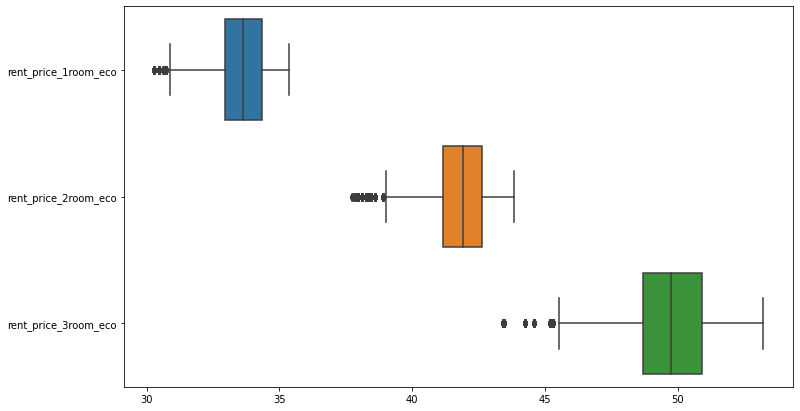

In [96]:
box_plot_columns(df_full, ['rent_price_1room_eco','rent_price_2room_eco','rent_price_3room_eco'])

В принципе ничего особенного, только в редких случаях есть шанс что трехкомнатная квартира может сдаться почти по цене близкой к средней двухкомнатной квартиры

### 1.7.1.6 state

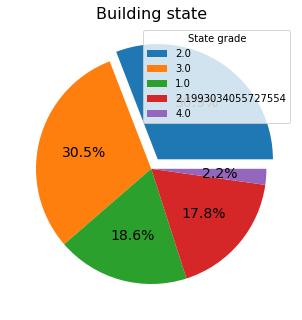

In [103]:
state_data = df_full.state.value_counts()

fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.pie(state_data, explode = [0.1, 0, 0, 0, 0], autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Building state', size=16)
ax.legend(title='State grade', labels=state_data.index, loc='upper right')
plt.show()

- В принципе про количество и типы данных здесь не нужно подробно расписывать, количество - процентное соотношение

### 1.7.1.7 build_year

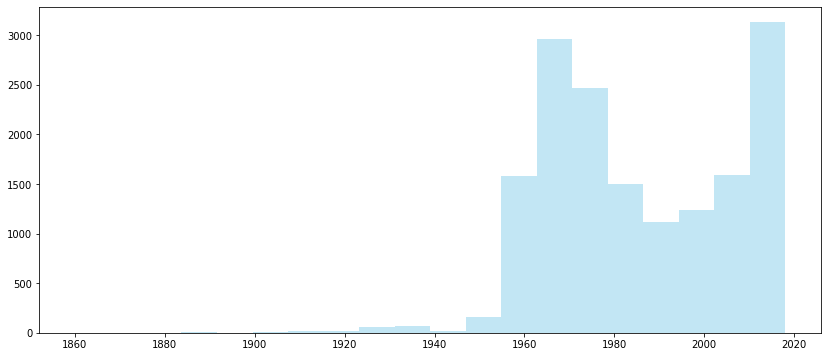

In [97]:
fig = plt.figure(figsize=(14, 6))
plt.hist(df_full['build_year'], bins=20, color='skyblue', alpha=0.5, histtype='bar')
plt.show()

- Из этой гистограммы можно сделать вывод о том что большинство зданий было построено после 60-х годов
- Есть какой то выброс в виде 1691 года, мне кажется 

### 1.7.2 Анализ совместного влияния признаков и их влияния на целевой признак